<a href="https://colab.research.google.com/github/Nawshin-25/Saint_Martin/blob/main/Anomaly(00_20).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install -y libproj-dev proj-data proj-bin
!apt-get install -y libgeos-dev
!pip install cartopy

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libproj-dev is already the newest version (9.1.1-1~jammy0).
proj-bin is already the newest version (9.1.1-1~jammy0).
proj-data is already the newest version (9.1.1-1~jammy0).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgeos-dev is already the newest version (3.11.1-1~jammy0).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
!pip install gsw

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
from scipy.stats import linregress
import geopandas as gpd
import cartopy.crs as ccrs

In [ ]:
file_name = '/content/drive/MyDrive/Data/ReAn(00-20).nc'
ds = xr.open_dataset(file_name)
print (ds)
temperature = ds['thetao']
salinity = ds['so']

<xarray.Dataset> Size: 61MB
Dimensions:    (time: 7670, latitude: 12, longitude: 15, depth: 1)
Coordinates:
  * time       (time) datetime64[ns] 61kB 2000-01-01 2000-01-02 ... 2020-12-30
  * latitude   (latitude) float32 48B 20.17 20.25 20.33 ... 20.92 21.0 21.08
  * longitude  (longitude) float32 60B 91.33 91.42 91.5 ... 92.33 92.42 92.5
  * depth      (depth) float32 4B 0.494
Data variables:
    bottomT    (time, latitude, longitude) float32 6MB ...
    mlotst     (time, latitude, longitude) float32 6MB ...
    siconc     (time, latitude, longitude) float32 6MB ...
    sithick    (time, latitude, longitude) float32 6MB ...
    so         (time, depth, latitude, longitude) float32 6MB ...
    thetao     (time, depth, latitude, longitude) float32 6MB ...
    uo         (time, depth, latitude, longitude) float32 6MB ...
    usi        (time, latitude, longitude) float32 6MB ...
    vo         (time, depth, latitude, longitude) float32 6MB ...
    vsi        (time, latitude, longitude) f

In [ ]:
saint_martins_shape = gpd.read_file('/content/drive/MyDrive/Data/2021/Total_area_2021.shp')
mpa_border_shape = gpd.read_file('/content/drive/MyDrive/Data/2021/Saint_Martin MPA.shp')

# **Winter**

<ipython-input-17-2247d8285a8c>:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to leave space for the colorbar


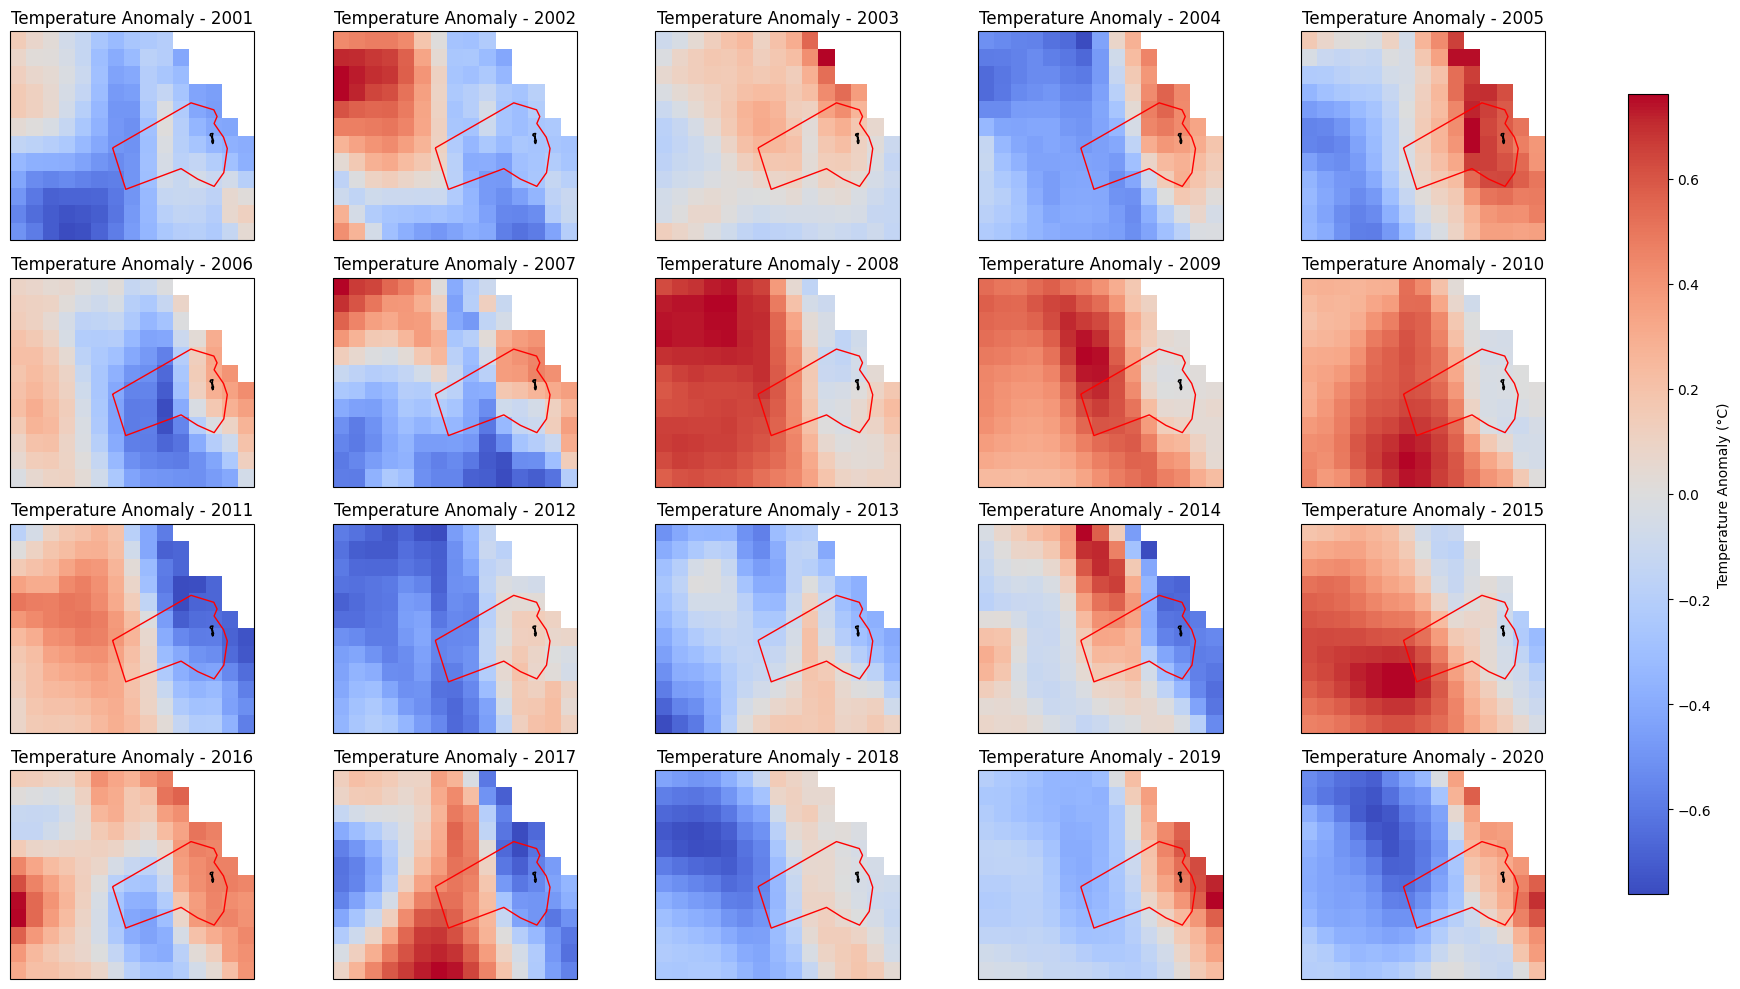

In [ ]:
time_winter = temperature['time'].sel(time=((temperature['time.year'] >= 2000) & (temperature['time.year'] <= 2020) &
                                              ((temperature['time.month'] == 1) |
                                               (temperature['time.month'] == 11) |
                                               (temperature['time.month'] == 12))))

temperature = temperature.sel(time=time_winter)
temperature_anomaly = temperature - temperature.mean(dim='time')
temperature_anomaly_mean = temperature_anomaly.groupby('time.year').mean(dim='time')

# Plot temperature anomaly for each year with a central shared colorbar
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})
cmap = 'coolwarm'

# Loop over the years
for i, year in enumerate(range(2001, 2021, 1)):
    ax = axes.flatten()[i]

    # Plot temperature anomaly
    temp_plot = temperature_anomaly_mean.sel(year=year).isel(depth=0).plot(
        ax=ax,
        cmap=cmap,
        add_colorbar=False  # Disable individual colorbars
    )

    # Overlay the shapefiles
    saint_martins_shape.boundary.plot(ax=ax, color='black', linewidth=1)
    mpa_border_shape.boundary.plot(ax=ax, color='red', linewidth=1)

    # Title and labels
    ax.set_title(f'Temperature Anomaly - {year}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

# Add a shared central colorbar
cbar_ax = fig.add_axes([0.85, 0.1, 0.02, 0.8])  # Adjust position and size for a central vertical colorbar
fig.colorbar(temp_plot, cax=cbar_ax, label='Temperature Anomaly (°C)')

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to leave space for the colorbar
plt.show()

<ipython-input-30-b3cd4570d5b5>:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to leave space for the colorbar


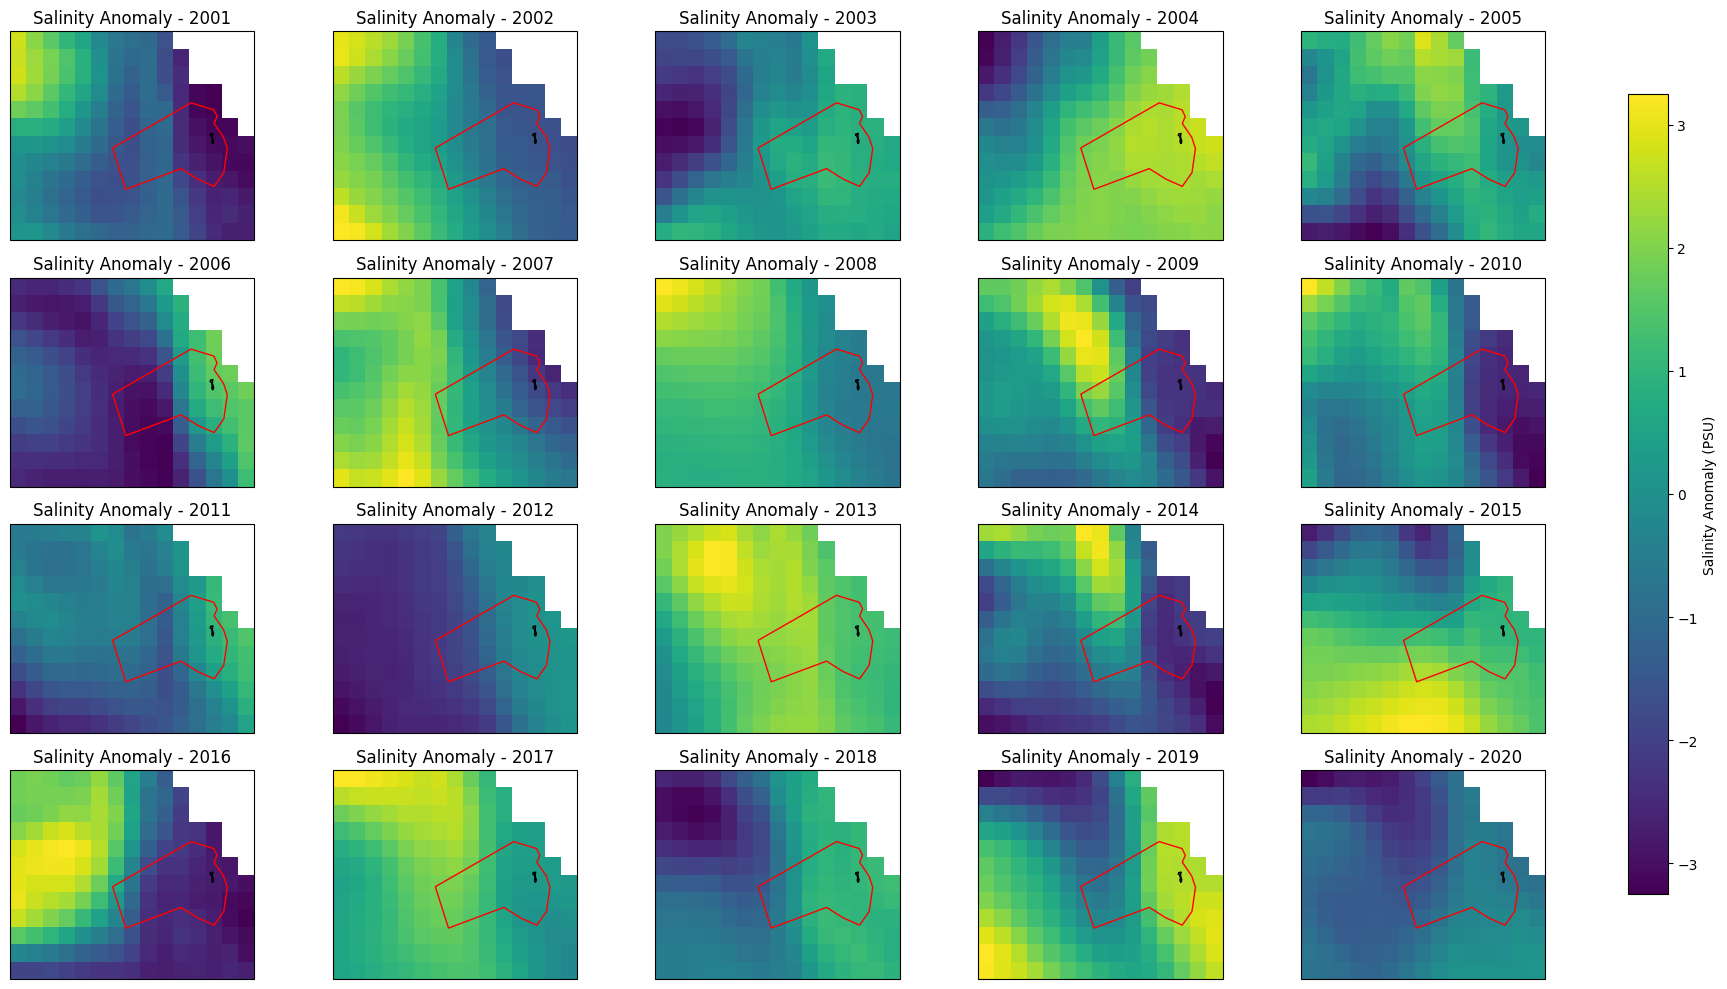

In [ ]:
time_winter = salinity['time'].sel(time=((salinity['time.year'] >= 2000) & (salinity['time.year'] <= 2020) &
                                              ((salinity['time.month'] == 1) |
                                               (salinity['time.month'] == 11) |
                                               (salinity['time.month'] == 12))))

salinity = salinity.sel(time=time_winter)
salinity_anomaly = salinity - salinity.mean(dim='time')
salinity_anomaly_mean = salinity_anomaly.groupby('time.year').mean(dim='time')

# Plot temperature anomaly for each year with a central shared colorbar
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})
cmap = 'viridis'

# Loop over the years
for i, year in enumerate(range(2001, 2021, 1)):
    ax = axes.flatten()[i]

    # Plot temperature anomaly
    sal_plot = salinity_anomaly_mean.sel(year=year).isel(depth=0).plot(
        ax=ax,
        cmap=cmap,
        add_colorbar=False  # Disable individual colorbars
    )

    # Overlay the shapefiles
    saint_martins_shape.boundary.plot(ax=ax, color='black', linewidth=1)
    mpa_border_shape.boundary.plot(ax=ax, color='red', linewidth=1)

    # Title and labels
    ax.set_title(f'Salinity Anomaly - {year}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

# Add a shared central colorbar
cbar_ax = fig.add_axes([0.85, 0.1, 0.02, 0.8])  # Adjust position and size for a central vertical colorbar
fig.colorbar(sal_plot, cax=cbar_ax, label='Salinity Anomaly (PSU)')

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to leave space for the colorbar
plt.show()

# **Premonsoon**

<ipython-input-20-aea26458dd5c>:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to leave space for the colorbar


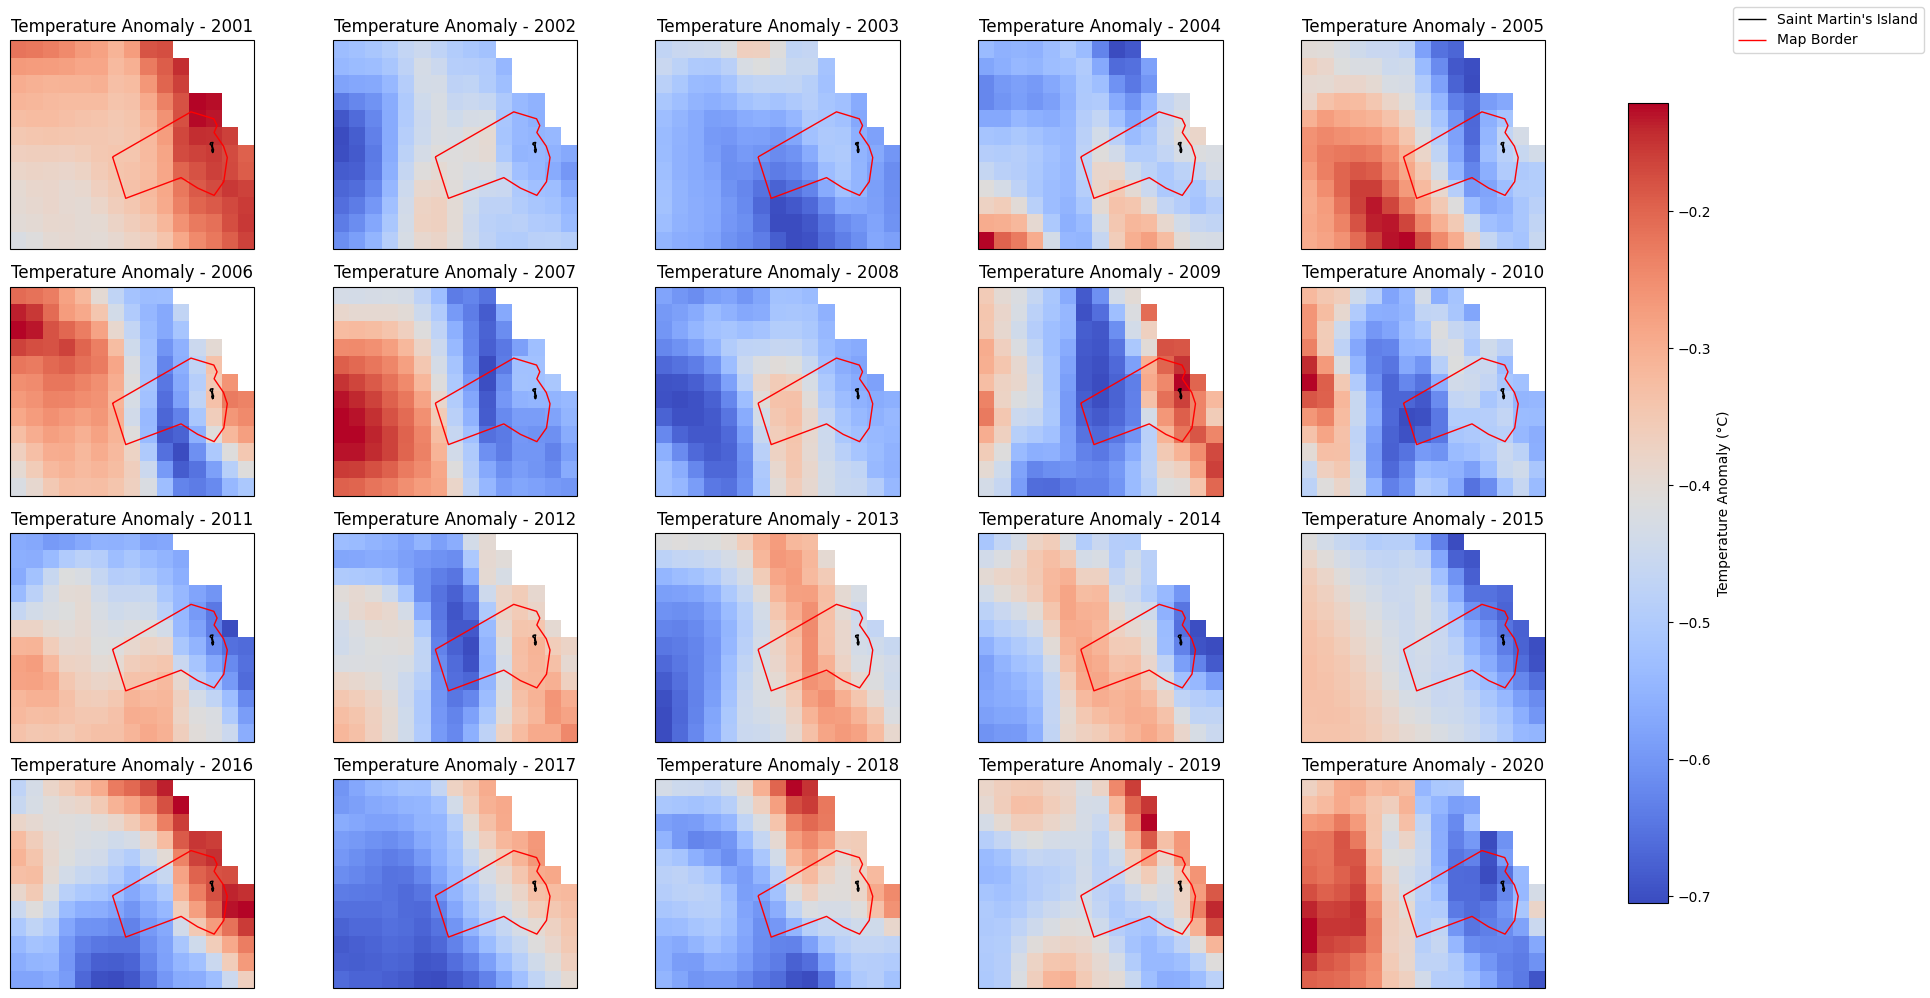

In [ ]:
time_premon = temperature['time'].sel(time=((temperature['time.year'] >= 2000) & (temperature['time.year'] <= 2020) &
                                              ((temperature['time.month'] == 2) |
                                               (temperature['time.month'] == 3) |
                                               (temperature['time.month'] == 4))))

temperature = temperature.sel(time=time_premon)
temperature_anomaly = temperature - temperature.mean(dim='time')
temperature_anomaly_mean = temperature_anomaly.groupby('time.year').mean(dim='time')

# Plot temperature anomaly for each year with a central shared colorbar
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})
cmap = 'coolwarm'

# Loop over the years
for i, year in enumerate(range(2001, 2021, 1)):
    ax = axes.flatten()[i]

    # Plot temperature anomaly
    temp_plot = temperature_anomaly_mean.sel(year=year).isel(depth=0).plot(
        ax=ax,
        cmap=cmap,
        add_colorbar=False  # Disable individual colorbars
    )

    # Overlay the shapefiles
    saint_martins_shape.boundary.plot(ax=ax, color='black', linewidth=1)
    mpa_border_shape.boundary.plot(ax=ax, color='red', linewidth=1)

    # Title and labels
    ax.set_title(f'Temperature Anomaly - {year}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

# Add a shared central colorbar
cbar_ax = fig.add_axes([0.85, 0.1, 0.02, 0.8])  # Adjust position and size for a central vertical colorbar
fig.colorbar(temp_plot, cax=cbar_ax, label='Temperature Anomaly (°C)')

# Add a shared legend for the shapefiles
fig.legend(['Saint Martin\'s Island', 'Map Border'], loc='upper right')

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to leave space for the colorbar
plt.show()

<ipython-input-33-8a710b6812e2>:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to leave space for the colorbar


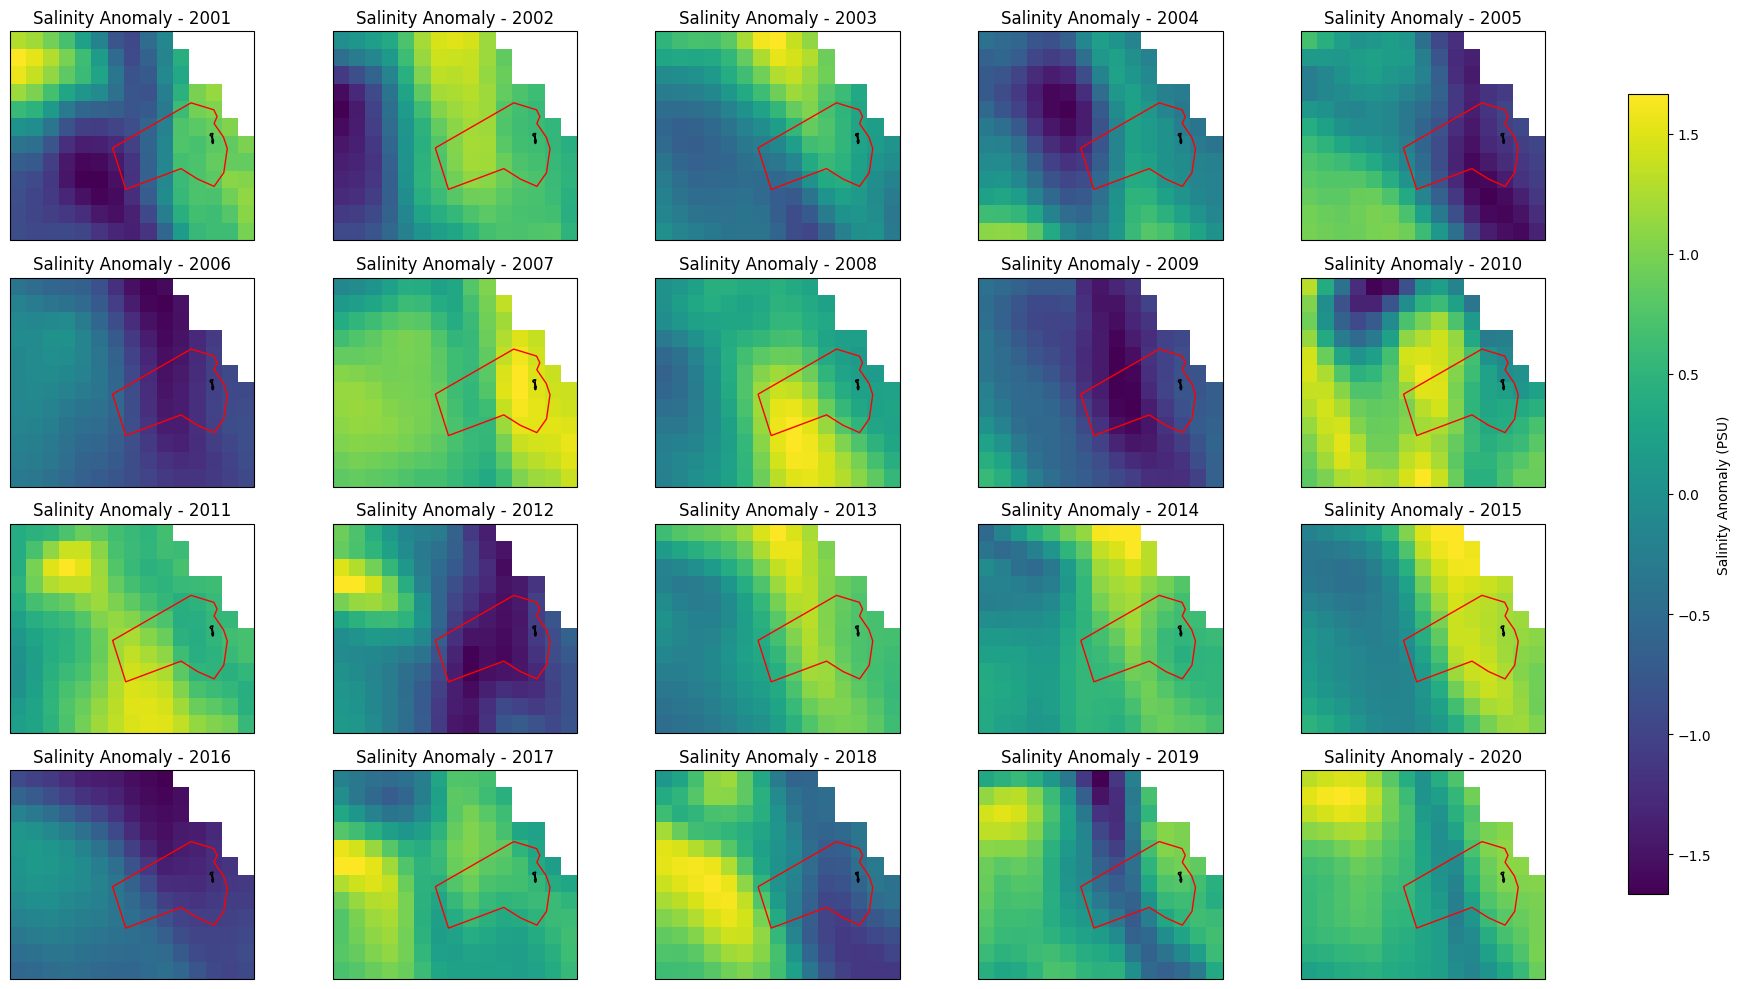

In [ ]:
time_premon = salinity['time'].sel(time=((salinity['time.year'] >= 2000) & (salinity['time.year'] <= 2020) &
                                              ((salinity['time.month'] == 2) |
                                               (salinity['time.month'] == 3) |
                                               (salinity['time.month'] == 4))))

salinity = salinity.sel(time=time_premon)
salinity_anomaly = salinity - salinity.mean(dim='time')
salinity_anomaly_mean = salinity_anomaly.groupby('time.year').mean(dim='time')

# Plot temperature anomaly for each year with a central shared colorbar
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})
cmap = 'viridis'

for i, year in enumerate(range(2001, 2021, 1)):
    ax = axes.flatten()[i]

    sal_plot = salinity_anomaly_mean.sel(year=year).isel(depth=0).plot(
        ax=ax,
        cmap=cmap,
        add_colorbar=False  # Disable individual colorbars
    )

    saint_martins_shape.boundary.plot(ax=ax, color='black', linewidth=1)
    mpa_border_shape.boundary.plot(ax=ax, color='red', linewidth=1)

    ax.set_title(f'Salinity Anomaly - {year}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

cbar_ax = fig.add_axes([0.85, 0.1, 0.02, 0.8])  # Adjust position and size for a central vertical colorbar
fig.colorbar(sal_plot, cax=cbar_ax, label='Salinity Anomaly (PSU)')

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to leave space for the colorbar
plt.show()

# **Monsoon**

<ipython-input-23-5dd03bee7a74>:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to leave space for the colorbar


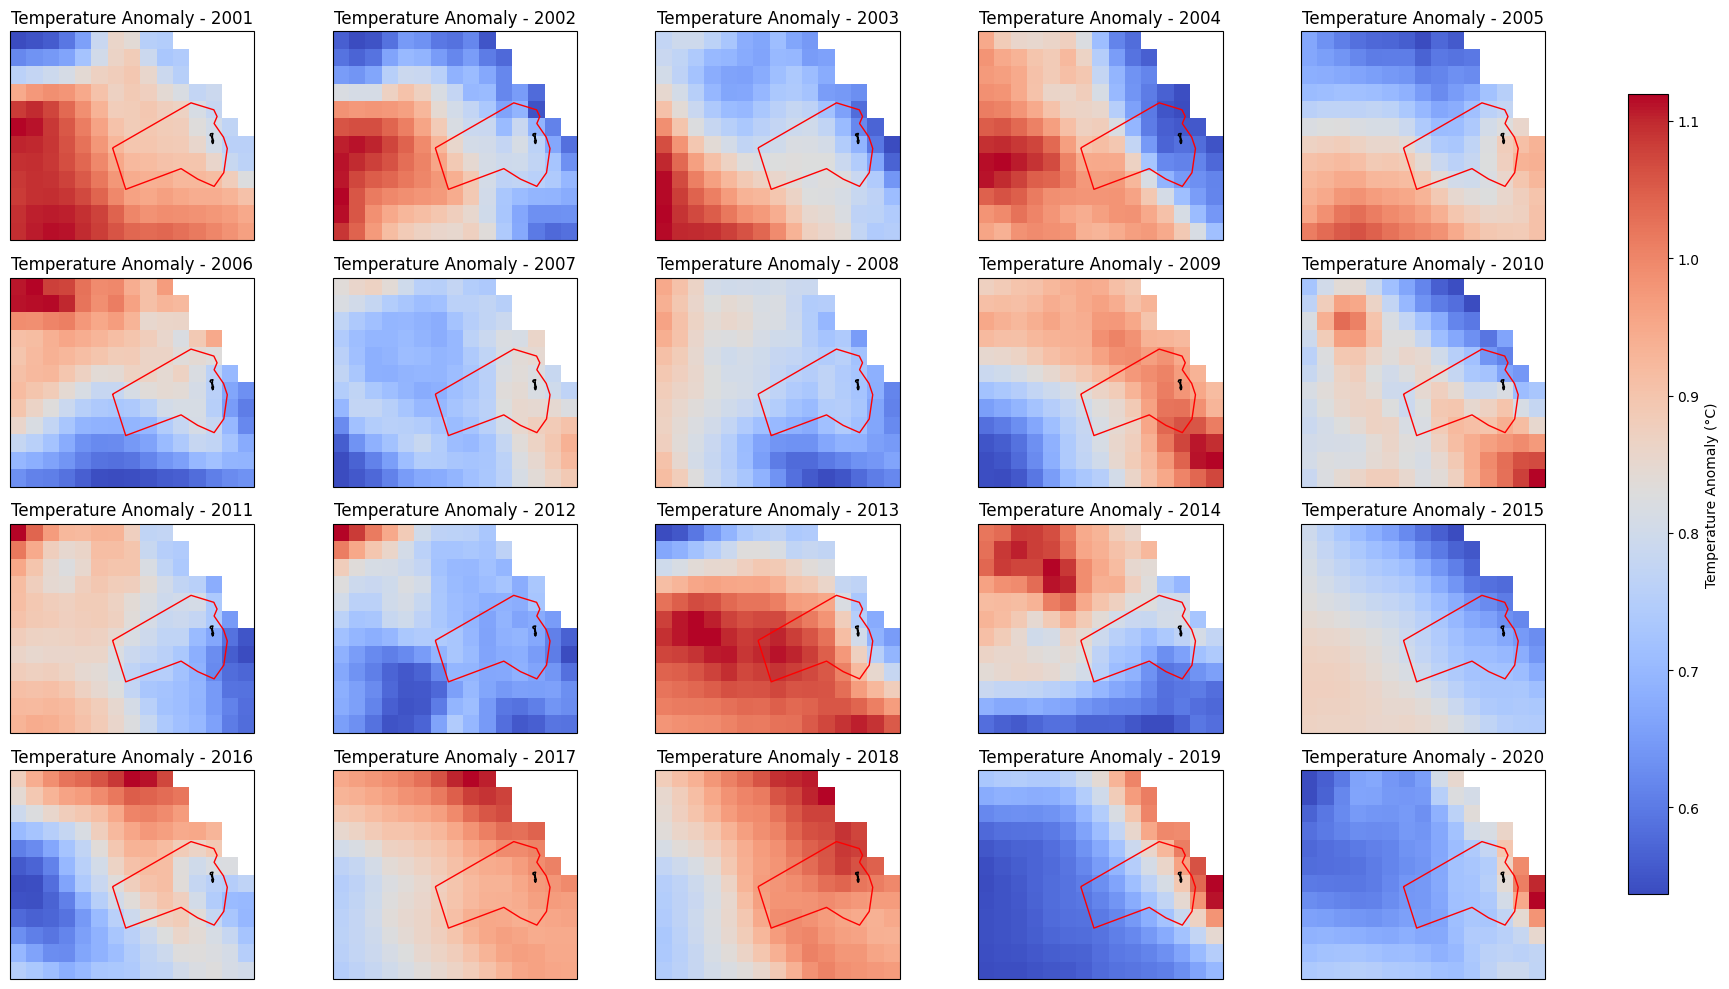

In [ ]:
time_monsoon = temperature['time'].sel(time=((temperature['time.year'] >= 2000) & (temperature['time.year'] <= 2020) &
                                              ((temperature['time.month'] == 5) |
                                               (temperature['time.month'] == 6) |
                                               (temperature['time.month'] == 7))))

temperature = temperature.sel(time=time_monsoon)
temperature_anomaly = temperature - temperature.mean(dim='time')
temperature_anomaly_mean = temperature_anomaly.groupby('time.year').mean(dim='time')

# Plot temperature anomaly for each year with a central shared colorbar
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})
cmap = 'coolwarm'

# Loop over the years
for i, year in enumerate(range(2001, 2021, 1)):
    ax = axes.flatten()[i]

    # Plot temperature anomaly
    temp_plot = temperature_anomaly_mean.sel(year=year).isel(depth=0).plot(
        ax=ax,
        cmap=cmap,
        add_colorbar=False  # Disable individual colorbars
    )

    # Overlay the shapefiles
    saint_martins_shape.boundary.plot(ax=ax, color='black', linewidth=1)
    mpa_border_shape.boundary.plot(ax=ax, color='red', linewidth=1)

    # Title and labels
    ax.set_title(f'Temperature Anomaly - {year}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

# Add a shared central colorbar
cbar_ax = fig.add_axes([0.85, 0.1, 0.02, 0.8])  # Adjust position and size for a central vertical colorbar
fig.colorbar(temp_plot, cax=cbar_ax, label='Temperature Anomaly (°C)')

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to leave space for the colorbar
plt.show()

<ipython-input-36-114743adf3b8>:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to leave space for the colorbar


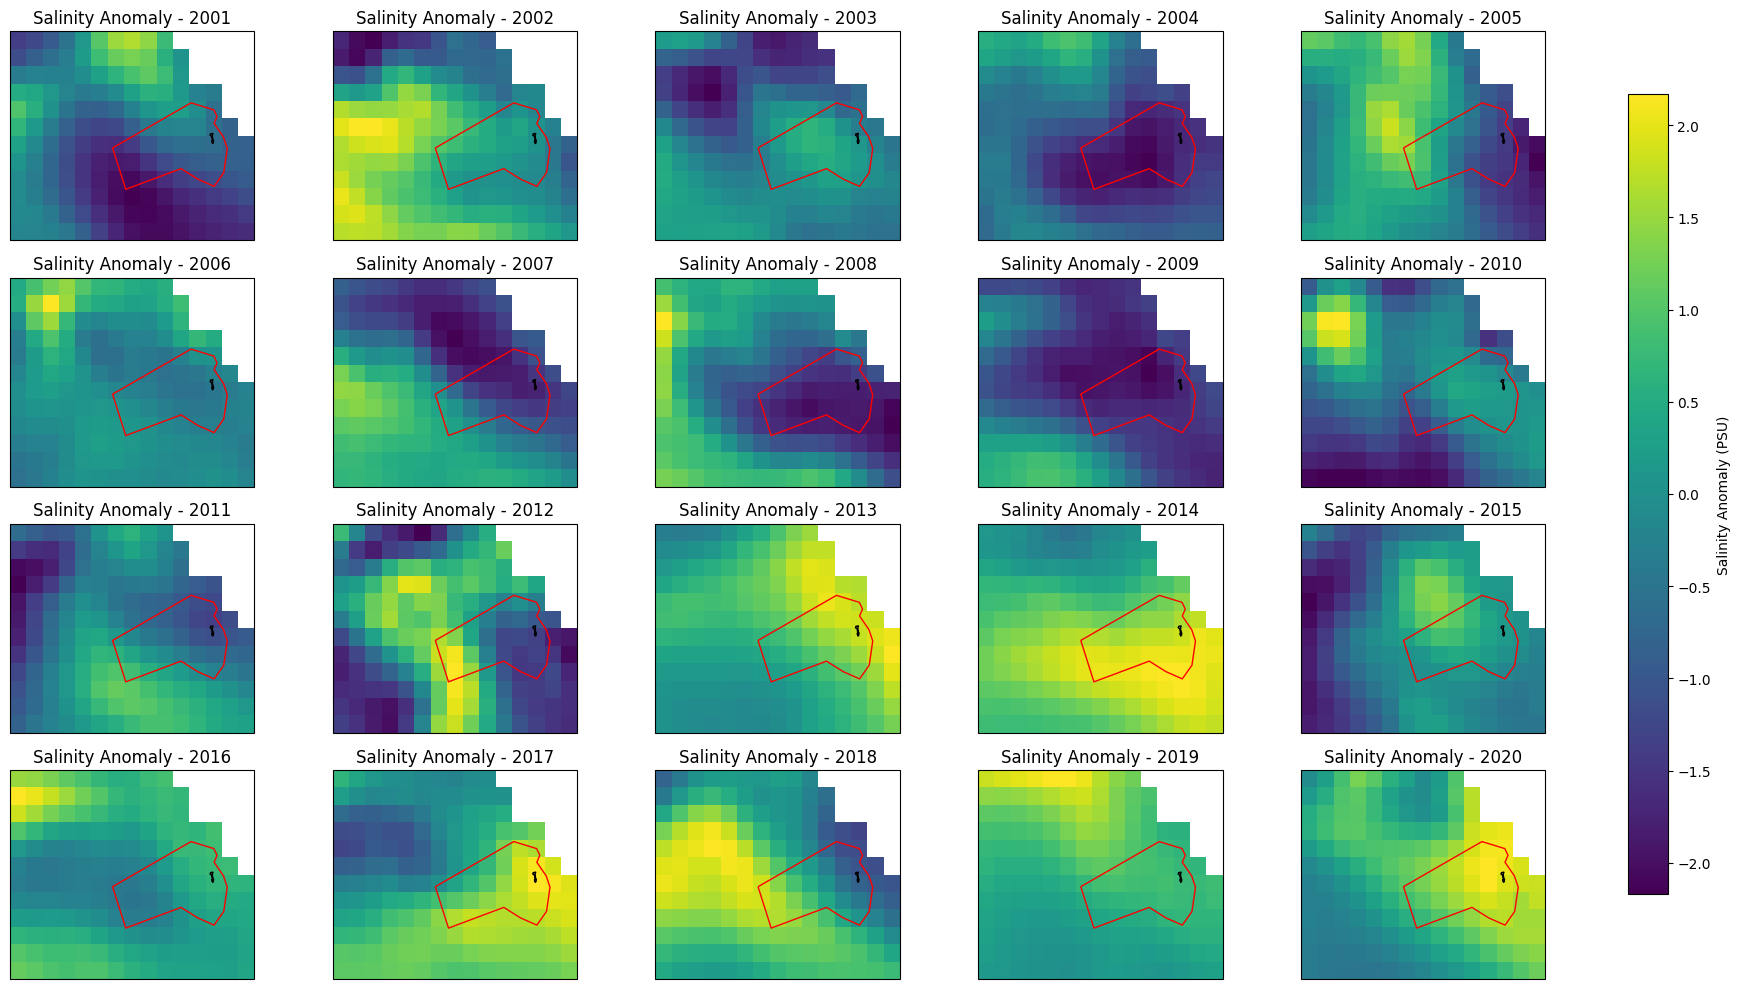

In [ ]:
time_premon = salinity['time'].sel(time=((salinity['time.year'] >= 2000) & (salinity['time.year'] <= 2020) &
                                              ((salinity['time.month'] == 5) |
                                               (salinity['time.month'] == 6) |
                                               (salinity['time.month'] == 7))))

salinity = salinity.sel(time=time_premon)
salinity_anomaly = salinity - salinity.mean(dim='time')
salinity_anomaly_mean = salinity_anomaly.groupby('time.year').mean(dim='time')

# Plot temperature anomaly for each year with a central shared colorbar
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})
cmap = 'viridis'

for i, year in enumerate(range(2001, 2021, 1)):
    ax = axes.flatten()[i]

    sal_plot = salinity_anomaly_mean.sel(year=year).isel(depth=0).plot(
        ax=ax,
        cmap=cmap,
        add_colorbar=False  # Disable individual colorbars
    )

    saint_martins_shape.boundary.plot(ax=ax, color='black', linewidth=1)
    mpa_border_shape.boundary.plot(ax=ax, color='red', linewidth=1)

    ax.set_title(f'Salinity Anomaly - {year}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

cbar_ax = fig.add_axes([0.85, 0.1, 0.02, 0.8])  # Adjust position and size for a central vertical colorbar
fig.colorbar(sal_plot, cax=cbar_ax, label='Salinity Anomaly (PSU)')

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to leave space for the colorbar
plt.show()

# **Postmonsoon**

<ipython-input-25-7d59e3c6dceb>:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to leave space for the colorbar


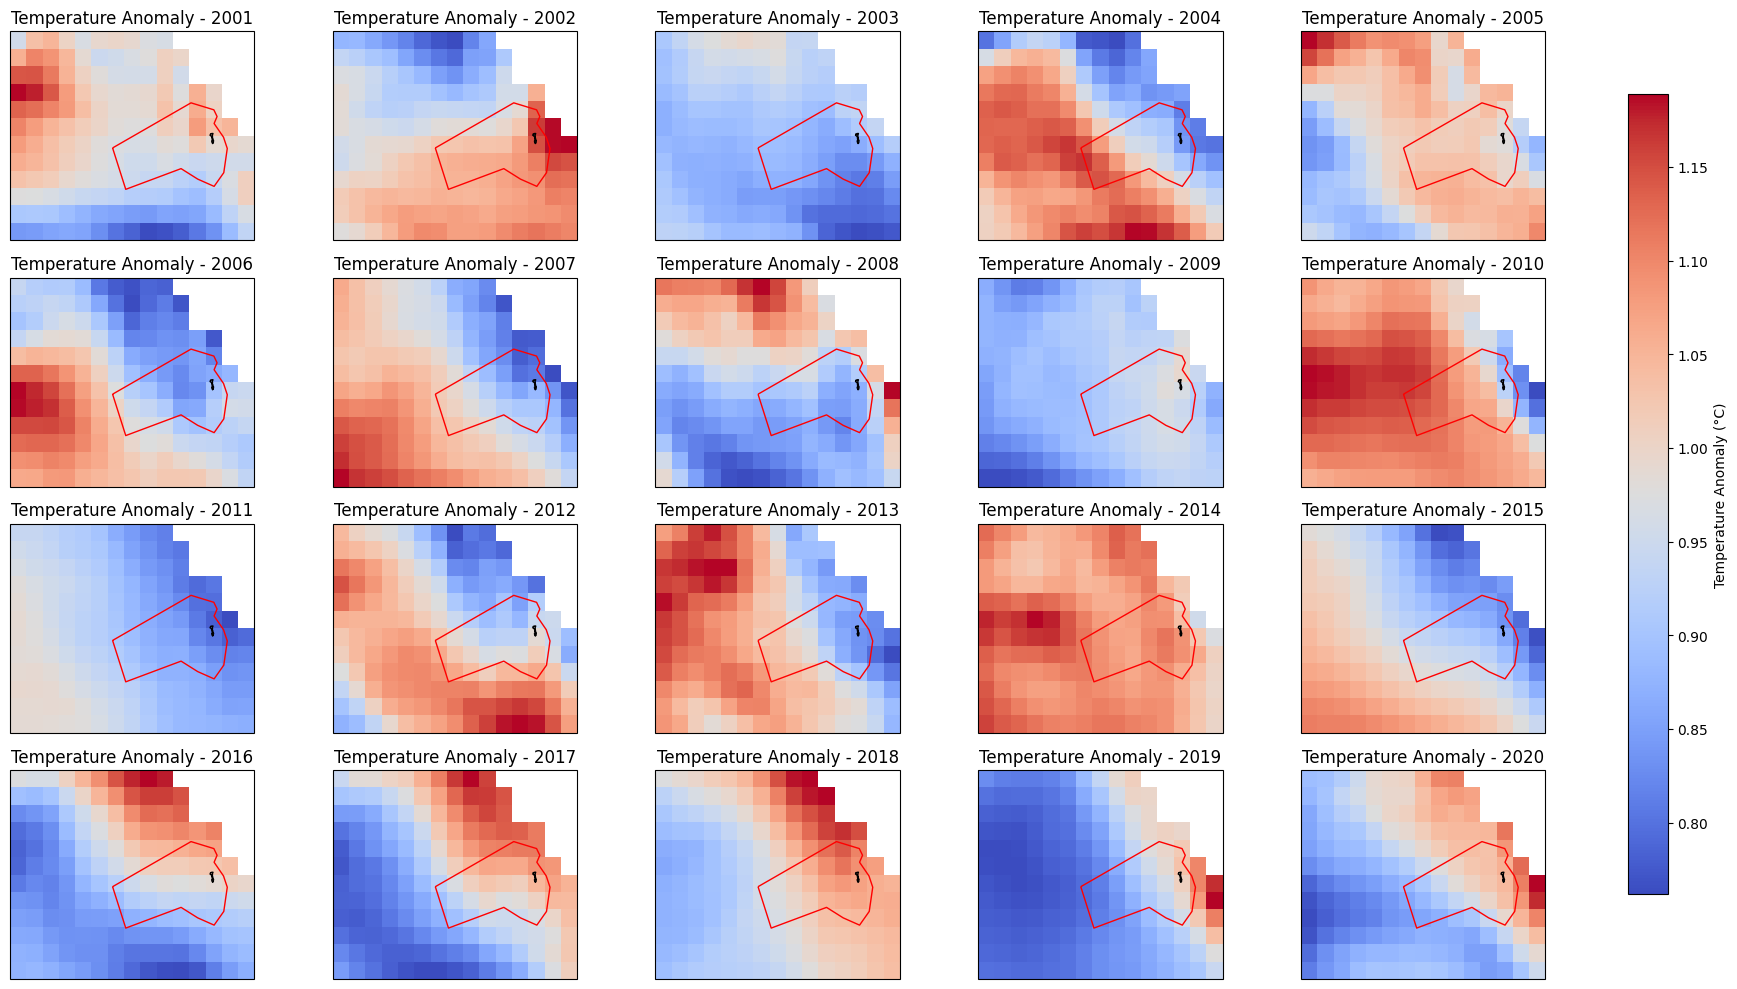

In [ ]:
time_postmon = temperature['time'].sel(time=((temperature['time.year'] >= 2000) & (temperature['time.year'] <= 2020) &
                                              ((temperature['time.month'] == 8) |
                                               (temperature['time.month'] == 9) |
                                               (temperature['time.month'] == 10))))

temperature = temperature.sel(time=time_postmon)
temperature_anomaly = temperature - temperature.mean(dim='time')
temperature_anomaly_mean = temperature_anomaly.groupby('time.year').mean(dim='time')

# Plot temperature anomaly for each year with a central shared colorbar
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})
cmap = 'coolwarm'

# Loop over the years
for i, year in enumerate(range(2001, 2021, 1)):
    ax = axes.flatten()[i]

    # Plot temperature anomaly
    temp_plot = temperature_anomaly_mean.sel(year=year).isel(depth=0).plot(
        ax=ax,
        cmap=cmap,
        add_colorbar=False  # Disable individual colorbars
    )

    # Overlay the shapefiles
    saint_martins_shape.boundary.plot(ax=ax, color='black', linewidth=1)
    mpa_border_shape.boundary.plot(ax=ax, color='red', linewidth=1)

    # Title and labels
    ax.set_title(f'Temperature Anomaly - {year}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

# Add a shared central colorbar
cbar_ax = fig.add_axes([0.85, 0.1, 0.02, 0.8])  # Adjust position and size for a central vertical colorbar
fig.colorbar(temp_plot, cax=cbar_ax, label='Temperature Anomaly (°C)')

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to leave space for the colorbar
plt.show()

<ipython-input-38-310275a17fa7>:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to leave space for the colorbar


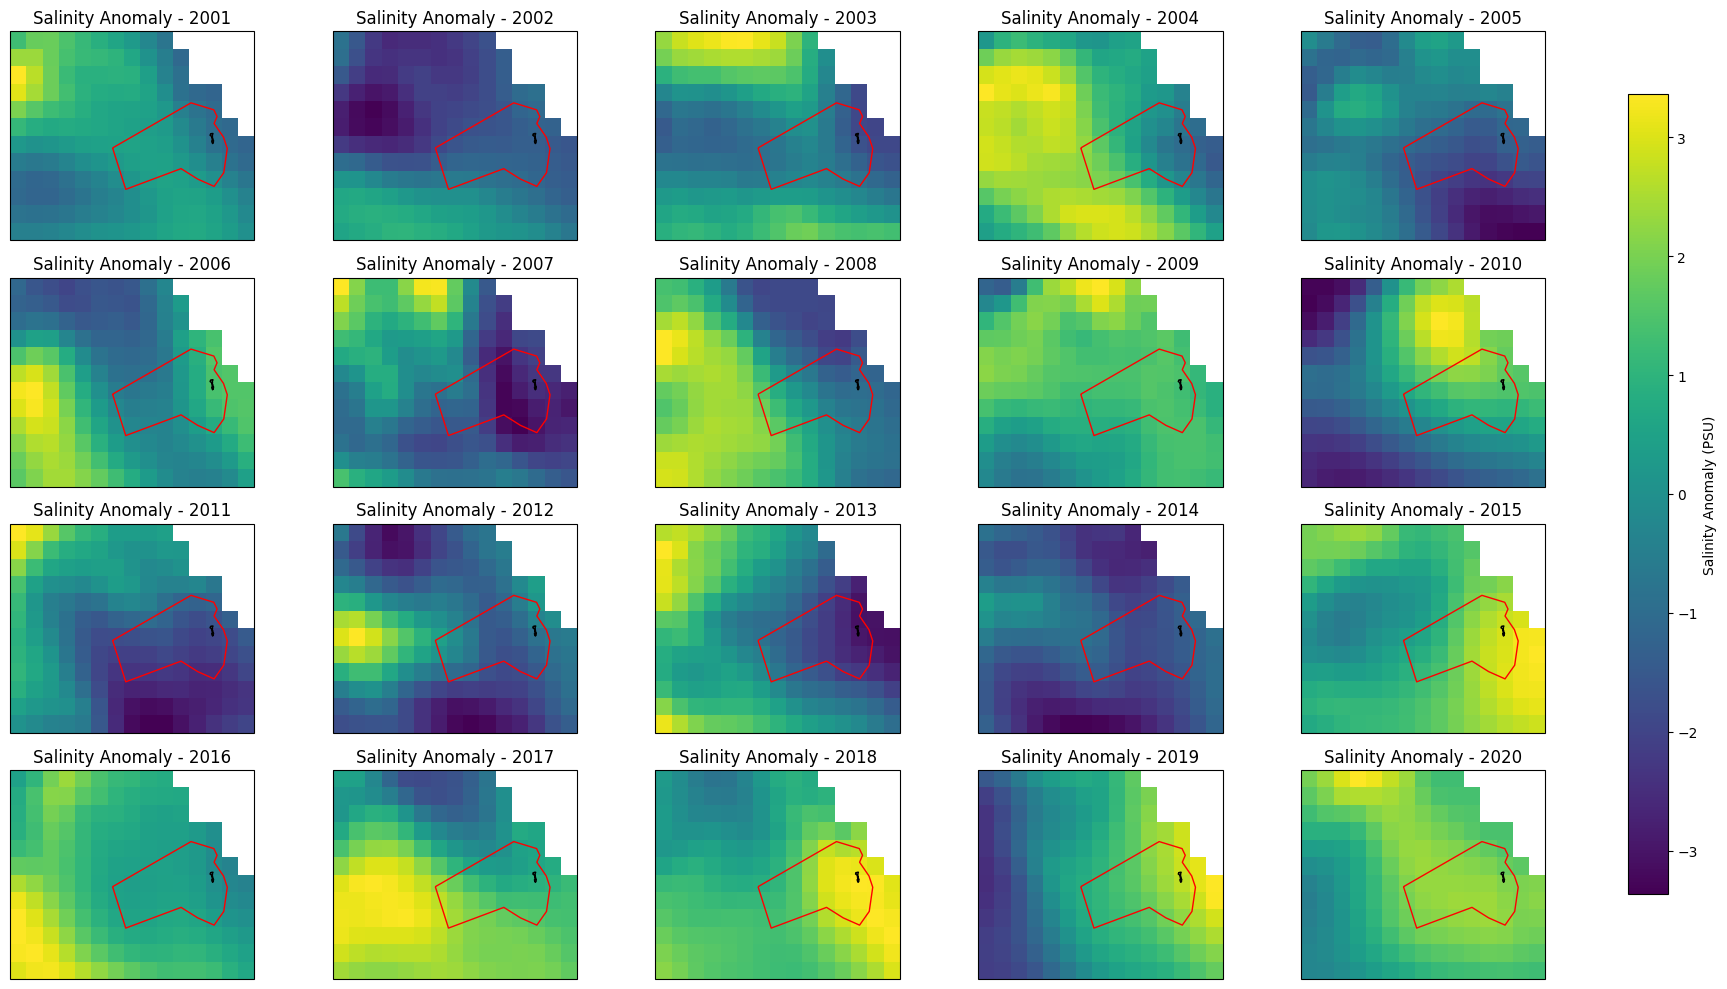

In [ ]:
time_premon = salinity['time'].sel(time=((salinity['time.year'] >= 2000) & (salinity['time.year'] <= 2020) &
                                              ((salinity['time.month'] == 8) |
                                               (salinity['time.month'] == 9) |
                                               (salinity['time.month'] == 10))))

salinity = salinity.sel(time=time_premon)
salinity_anomaly = salinity - salinity.mean(dim='time')
salinity_anomaly_mean = salinity_anomaly.groupby('time.year').mean(dim='time')

# Plot temperature anomaly for each year with a central shared colorbar
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})
cmap = 'viridis'

for i, year in enumerate(range(2001, 2021, 1)):
    ax = axes.flatten()[i]

    sal_plot = salinity_anomaly_mean.sel(year=year).isel(depth=0).plot(
        ax=ax,
        cmap=cmap,
        add_colorbar=False  # Disable individual colorbars
    )

    saint_martins_shape.boundary.plot(ax=ax, color='black', linewidth=1)
    mpa_border_shape.boundary.plot(ax=ax, color='red', linewidth=1)

    ax.set_title(f'Salinity Anomaly - {year}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

cbar_ax = fig.add_axes([0.85, 0.1, 0.02, 0.8])  # Adjust position and size for a central vertical colorbar
fig.colorbar(sal_plot, cax=cbar_ax, label='Salinity Anomaly (PSU)')

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to leave space for the colorbar
plt.show()

In [ ]:
time_filtered = ds.time.sel(time=slice('2000-01-01', '2020-12-31'))
lat_idx = 0  # Select the first latitude index
lon_idx = 0  # Select the first longitude index
depth_idx = 0  # Select the first depth index (surface)

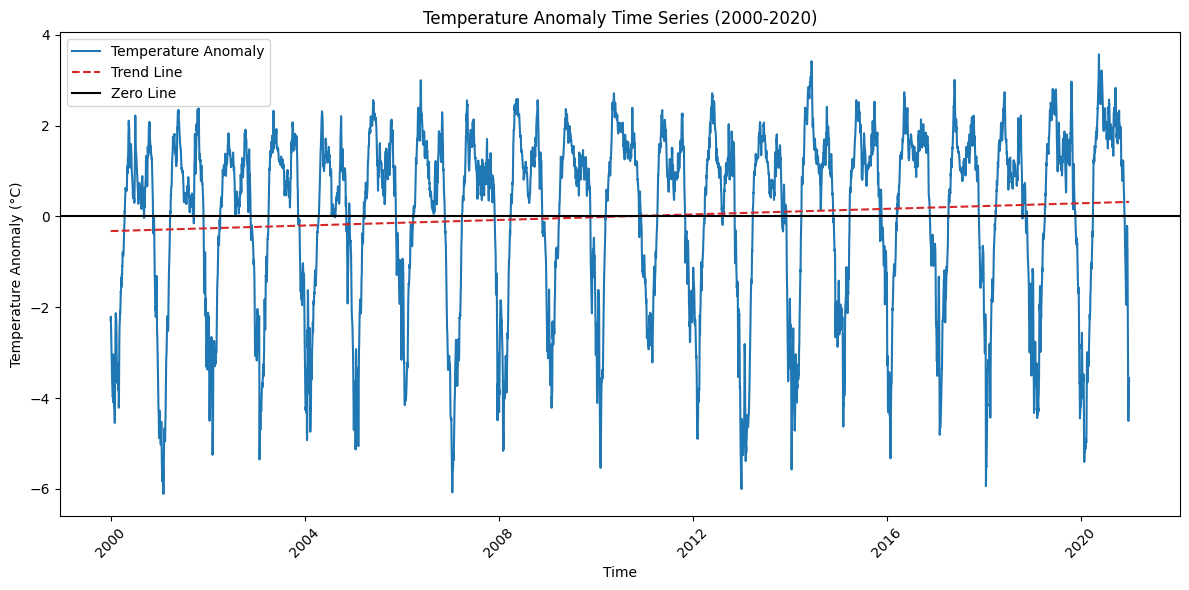

In [ ]:
temperature_anomaly = temperature - temperature.mean(dim='time')
# Extract the anomalies for the chosen lat-lon point
temperature_anomaly_timeseries = temperature_anomaly.sel(time=time_filtered, latitude=ds.latitude[lat_idx], longitude=ds.longitude[lon_idx], depth=ds.depth[depth_idx])

time_numeric = np.arange(len(temperature_anomaly_timeseries.time))
trend_coeffs = np.polyfit(time_numeric, temperature_anomaly_timeseries, 1)
trend_line = np.polyval(trend_coeffs, time_numeric)

# Plot Temperature Anomaly Time Series
plt.figure(figsize=(12, 6))
plt.plot(temperature_anomaly_timeseries.time, temperature_anomaly_timeseries, label='Temperature Anomaly', color='tab:blue')
plt.plot(temperature_anomaly_timeseries.time, trend_line, label='Trend Line', color='tab:red', linestyle='--')
plt.axhline(0, color='black', linestyle='-', label='Zero Line')
plt.title('Temperature Anomaly Time Series (2000-2020)')
plt.xlabel('Time')
plt.ylabel('Temperature Anomaly (°C)')
plt.grid(False)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Get the temperature anomaly values
temperature_anomaly_values = temperature_anomaly_timeseries.values

# Calculate the zero/mean value
mean_anomaly = np.mean(temperature_anomaly_values)

# Calculate the range of anomalies (difference between max and min values)
anomaly_range = np.ptp(temperature_anomaly_values)

# Calculate the total change (the difference between the last and first anomaly values)
total_change = temperature_anomaly_values[-1] - temperature_anomaly_values[0]

# Print the results
print(f"Mean Anomaly (Zero value): {mean_anomaly:.2f} °C")
print(f"Anomaly Range: {anomaly_range:.2f} °C")
print(f"Total Change in Temperature: {total_change:.2f} °C")

Mean Anomaly (Zero value): -0.00 °C
Anomaly Range: 9.69 °C
Total Change in Temperature: -1.28 °C


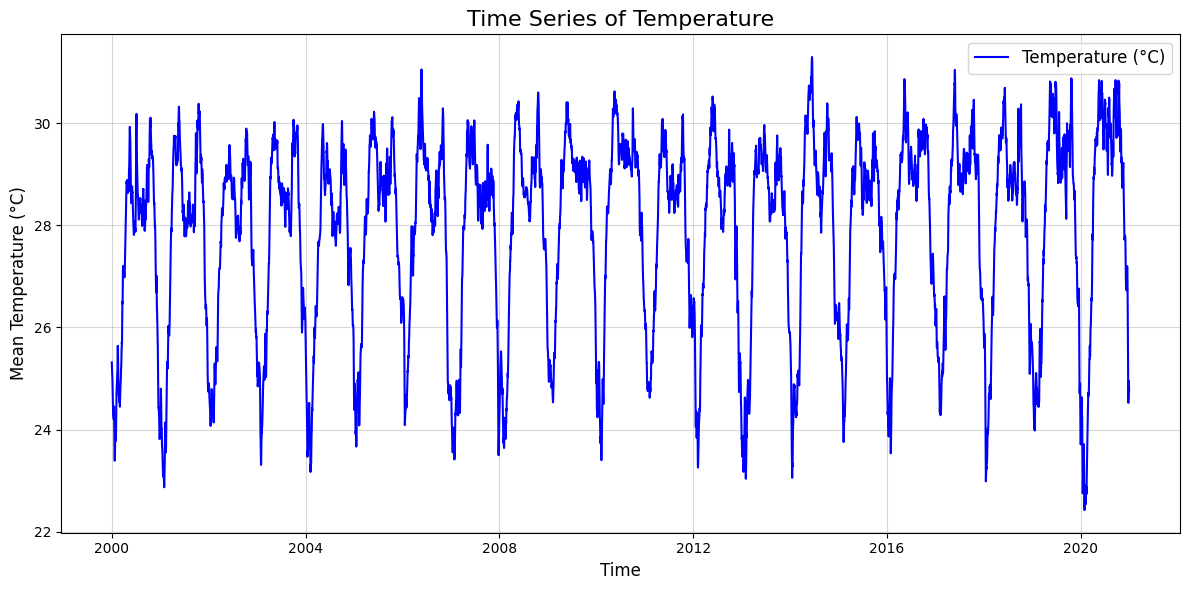

In [ ]:
temperature_mean = temperature.mean(dim=['latitude', 'longitude', 'depth'])

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(temperature_mean['time'], temperature_mean, label='Temperature (°C)', color='blue')

# Add labels and title
plt.title('Time Series of Temperature', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Mean Temperature (°C)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

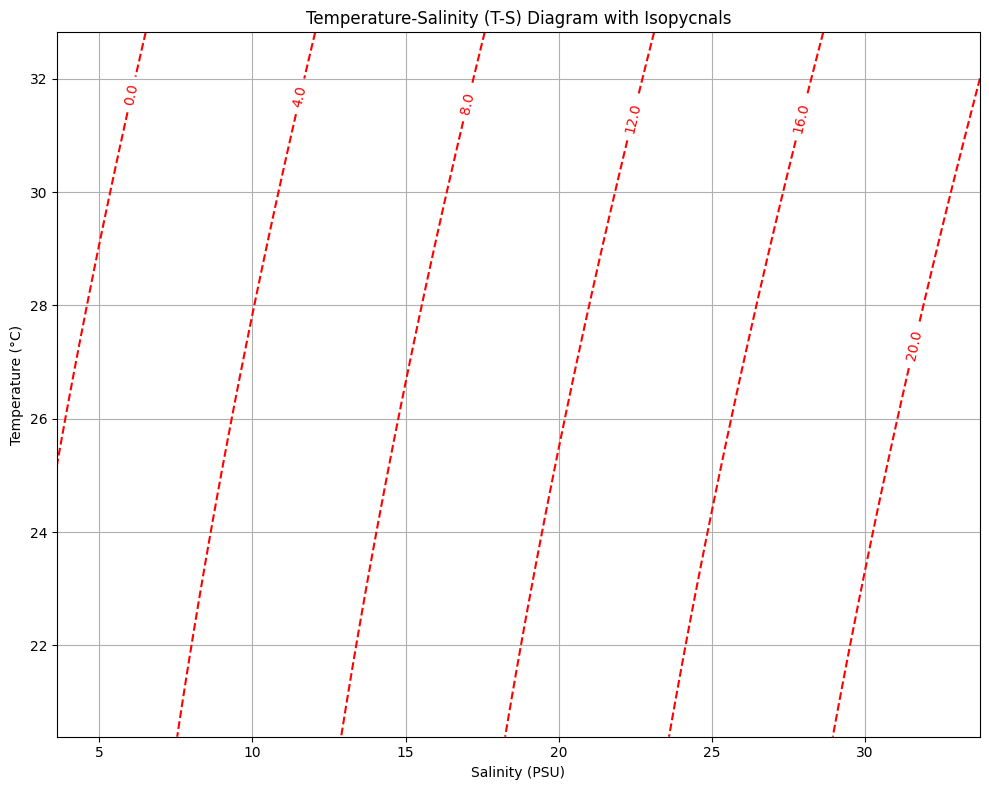

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import gsw  # Gibbs Seawater toolbox for calculating density

# Extract temperature and salinity from the dataset
temperature = ds['thetao'].values.flatten()  # Flatten to 1D array
salinity = ds['so'].values.flatten()

# Define the range of salinity and temperature for the grid
salinity_range = np.linspace(np.nanmin(salinity), np.nanmax(salinity), 100)
temperature_range = np.linspace(np.nanmin(temperature), np.nanmax(temperature), 100)

# Create a mesh grid for salinity and temperature
S, T = np.meshgrid(salinity_range, temperature_range)

# Calculate density (isopycnals) using the gsw library
density = gsw.sigma0(S, T)  # Density anomaly σ0

# Plot the T-S diagram
plt.figure(figsize=(10, 8))
contour = plt.contour(S, T, density, colors='red', linestyles='dashed')
plt.clabel(contour, inline=True, fontsize=10, fmt="%.1f")  # Add labels to isopycnals

# Labels and legend
plt.title("Temperature-Salinity (T-S) Diagram with Isopycnals")
plt.xlabel("Salinity (PSU)")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()

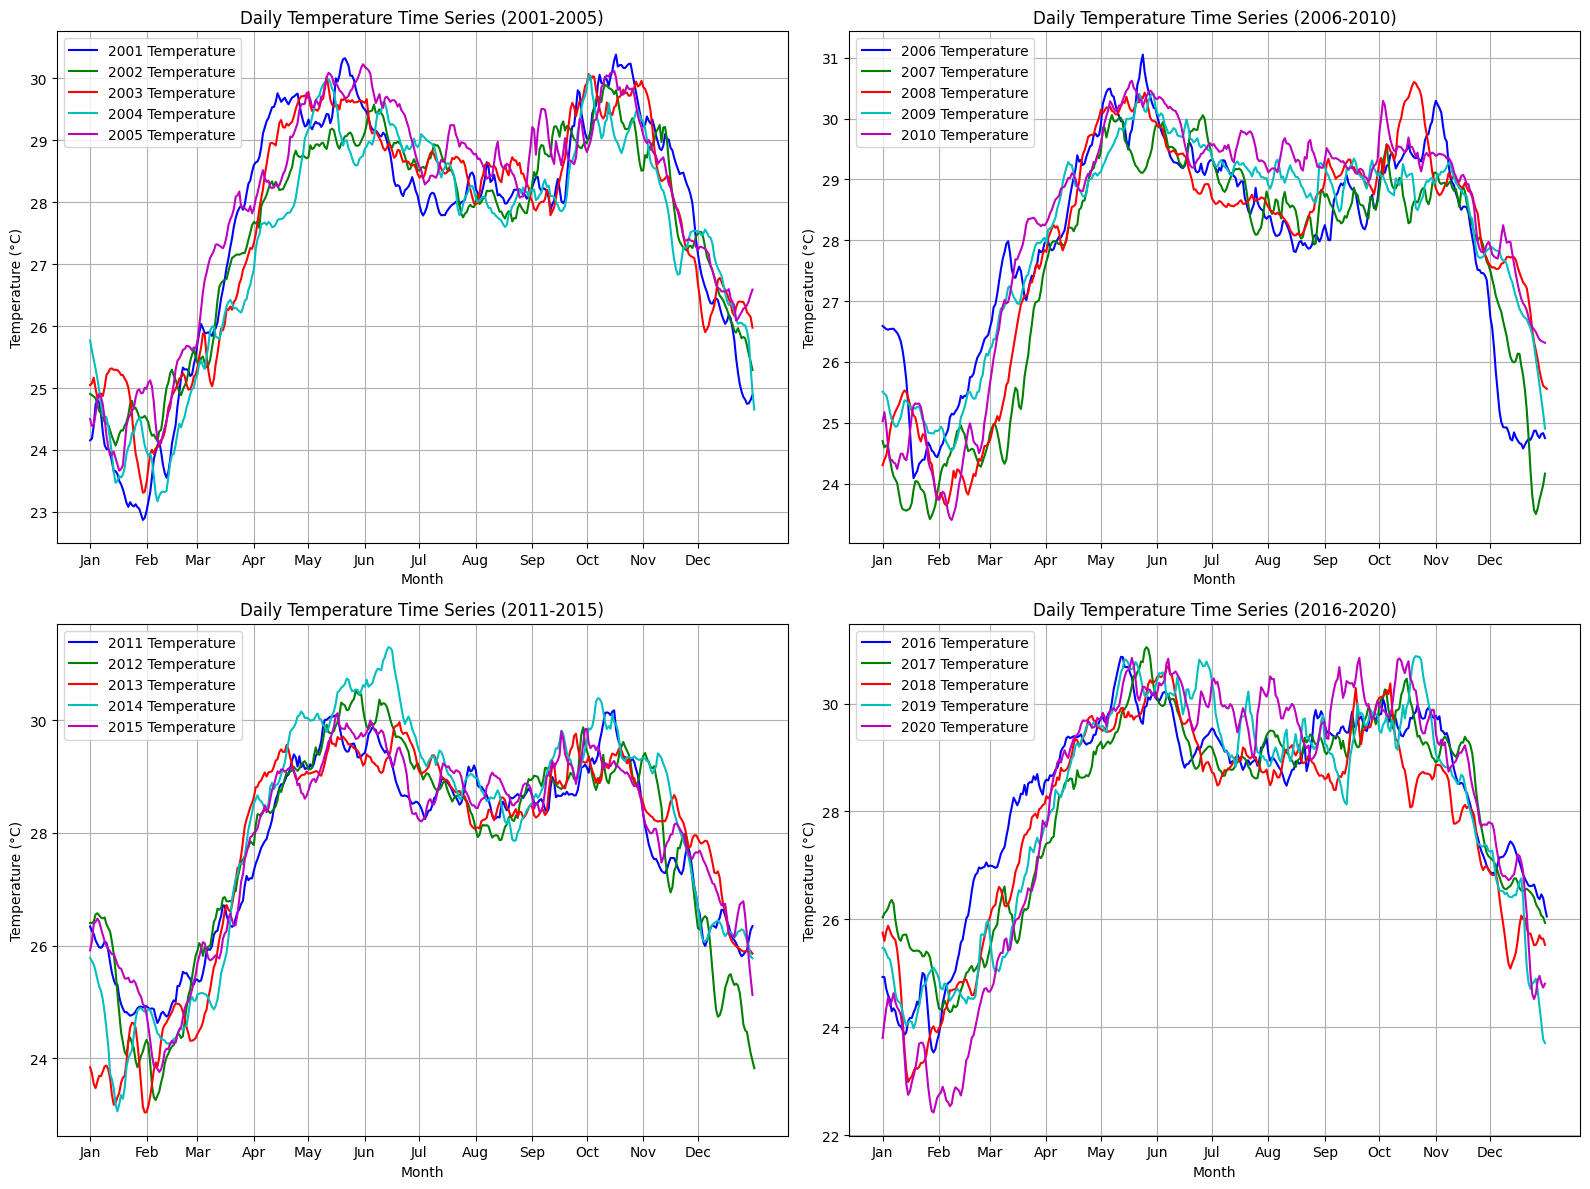

In [ ]:
temperature = ds['thetao'].mean(dim=['latitude', 'longitude', 'depth'])

# Function to process data for specific year ranges
def get_yearly_data(start_year, end_year):
    yearly_data = []
    for year in range(start_year, end_year + 1):
        temp = temperature.sel(time=slice(f"{year}-01-01", f"{year}-12-31"))
        yearly_data.append(temp)
    return yearly_data

# Define year ranges and process data
ranges = [(2001, 2005), (2006, 2010), (2011, 2015), (2016, 2020)]
all_data = [get_yearly_data(start, end) for start, end in ranges]

# Colors and labels
colors = ['b', 'g', 'r', 'c', 'm']
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
days_in_month = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]

# Create the figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # 2x2 grid of subplots
axes = axes.flatten()  # Flatten to easily index subplots

for i, (year_range, yearly_data) in enumerate(zip(ranges, all_data)):
    ax = axes[i]
    for temp, color, year in zip(yearly_data, colors, range(year_range[0], year_range[1] + 1)):
        day_of_year = pd.to_datetime(temp['time'].values).day_of_year
        ax.plot(day_of_year, temp, color=color, label=f'{year} Temperature')

    # Add labels, grid, legend, and title
    ax.set_xlabel("Month")
    ax.set_ylabel("Temperature (°C)")
    ax.set_title(f"Daily Temperature Time Series ({year_range[0]}-{year_range[1]})")
    ax.set_xticks(days_in_month)
    ax.set_xticklabels(month_names)
    ax.grid(True)
    ax.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Function to calculate seasonal anomalies
def calculate_anomalies(data, season_months, start_year, end_year):
    """Calculate anomalies for a specific season."""
    # Select season
    season_data = data.sel(time=data['time.month'].isin(season_months))

    # Average over latitude, longitude, and depth before grouping
    spatial_mean = season_data.mean(dim=['latitude', 'longitude', 'depth'])

    # Group by year and calculate mean for the selected season
    season_mean = spatial_mean.groupby('time.year').mean(dim='time')

    # Select baseline period and calculate baseline mean
    baseline = season_mean.sel(year=slice(start_year, end_year)).mean(dim='year')

    # Calculate anomalies
    anomalies = season_mean - baseline
    return anomalies

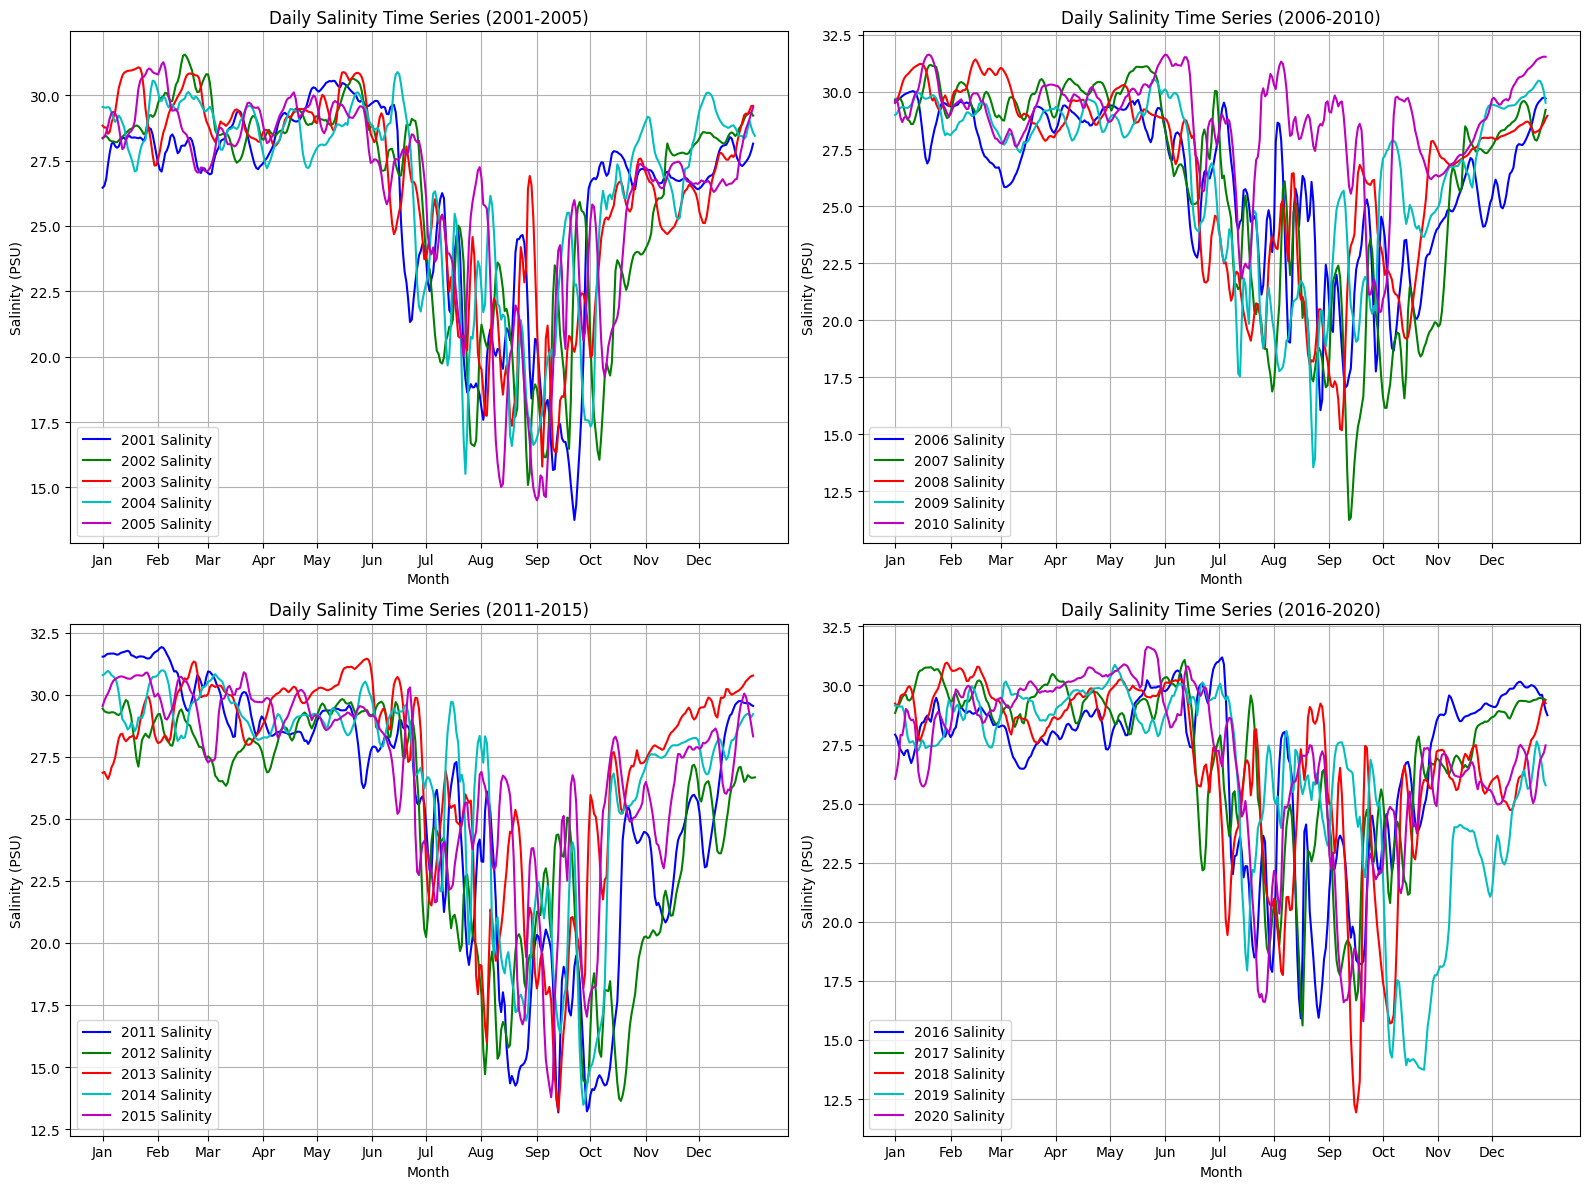

In [ ]:
Salinity = ds['so'].mean(dim=['latitude', 'longitude', 'depth'])

# Function to process data for specific year ranges
def get_yearly_data(start_year, end_year):
    yearly_data = []
    for year in range(start_year, end_year + 1):
        sal = Salinity.sel(time=slice(f"{year}-01-01", f"{year}-12-31"))
        yearly_data.append(sal)
    return yearly_data

# Define year ranges and process data
ranges = [(2001, 2005), (2006, 2010), (2011, 2015), (2016, 2020)]
all_data = [get_yearly_data(start, end) for start, end in ranges]

# Colors and labels
colors = ['b', 'g', 'r', 'c', 'm']
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
days_in_month = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]

# Create the figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # 2x2 grid of subplots
axes = axes.flatten()  # Flatten to easily index subplots

for i, (year_range, yearly_data) in enumerate(zip(ranges, all_data)):
    ax = axes[i]
    for temp, color, year in zip(yearly_data, colors, range(year_range[0], year_range[1] + 1)):
        day_of_year = pd.to_datetime(temp['time'].values).day_of_year
        ax.plot(day_of_year, temp, color=color, label=f'{year} Salinity')

    # Add labels, grid, legend, and title
    ax.set_xlabel("Month")
    ax.set_ylabel("Salinity (PSU)")
    ax.set_title(f"Daily Salinity Time Series ({year_range[0]}-{year_range[1]})")
    ax.set_xticks(days_in_month)
    ax.set_xticklabels(month_names)
    ax.grid(True)
    ax.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
def calculate_anomalies(data, season_months, start_year, end_year):
    """Calculate anomalies for a specific season."""
    # Select season
    season_data = data.sel(time=data['time.month'].isin(season_months))
    # Group by year and calculate the mean
    season_mean = season_data.groupby('time.year').mean(dim=['time', 'latitude', 'longitude', 'depth'])
    # Select the baseline period (2001-2020)
    baseline = season_mean.sel(year=slice(start_year, end_year)).mean(dim='year')
    # Calculate anomalies
    anomalies = season_mean - baseline
    return anomalies

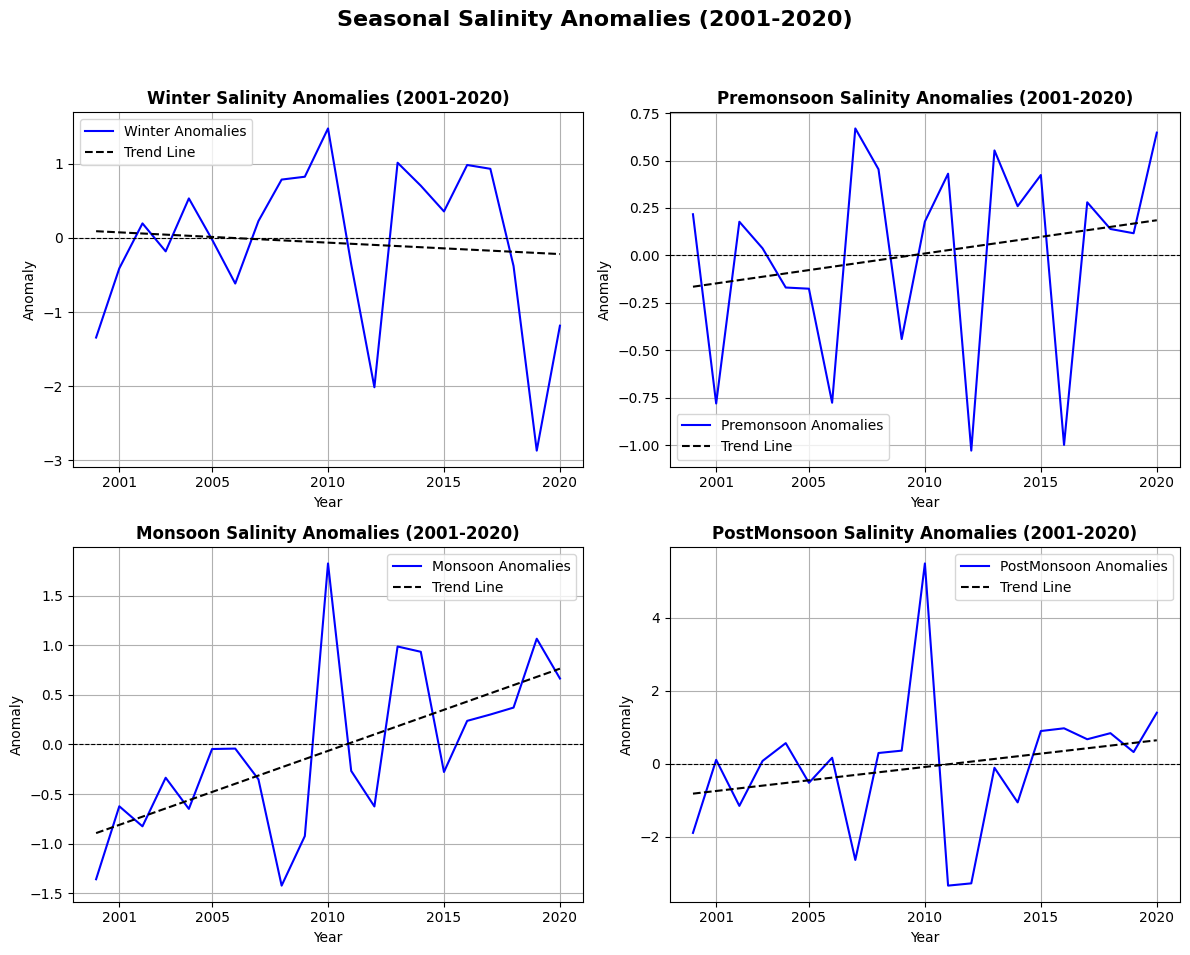

In [ ]:
seasons = {
    'Winter': [11, 12, 1],
    'Premonsoon': [2, 3, 4],
    'Monsoon': [5, 6, 7],
    'PostMonsoon': [8, 9, 10],
}

start_year, end_year = 2001, 2020
seasonal_anomalies = {season: calculate_anomalies(salinity, months, start_year, end_year) for season, months in seasons.items()}

# Plot seasonal anomalies
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Seasonal Salinity Anomalies (2001-2020)', fontsize=16, fontweight='bold')

for ax, (season, anomalies) in zip(axs.flat, seasonal_anomalies.items()):
    years = anomalies['year'].values
    values = anomalies.values.flatten()

    ax.plot(years, values, label=f'{season} Anomalies', color='blue')

    # Add trend line
    slope, intercept, r_value, p_value, std_err = linregress(years, values)
    trend_line = slope * years + intercept
    ax.plot(years, trend_line, color='black', linestyle='--', label='Trend Line')

    # Adjust x-ticks to show selected years (2001, 2005, 2010, 2015, 2020)
    selected_years = [2001, 2005, 2010, 2015, 2020]
    ax.set_xticks(selected_years)  # Set only these years as ticks
    ax.set_xticklabels(selected_years)  # Label them accordingly

    # Add titles and labels
    ax.set_title(f'{season} Salinity Anomalies (2001-2020)', fontsize=12, fontweight='bold')
    ax.set_xlabel('Year')
    ax.set_ylabel('Anomaly')
    ax.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Add a zero line
    ax.legend()
    ax.grid()

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()